#**Building Good Training Datasets–Data Preprocessing**


***

**좋은 학습 데이터셋 만드는 법 - 데이터 전처리**



 <br/><br/>

##**서론**

데이터의 품질과 포함된 유용한 정보의 양은 기계 **학습 알고리즘이 얼마나 잘 학습할 수 있는지**를 결정하는 핵심 요소이다.

따라서 기계 학습 알고리듬에 데이터 세트를 공급하기 전에 **데이터 세트를 검사하고 사전 처리하는 것이 절대적으로 중요**하다.

이 장에서 다룰 내용

* 데이터 집합에서 결측값 제거 및 귀속  
* 기계 학습 알고리즘을 위한 범주형 데이터 구체화  
* 모델 구성에 대한 관련 기능 선택





---



 <br/><br/>

## **Dealing with missing data**



**결측 데이터 처리**

실제 훈련데이터 세트에서 다양한 이유로 하나 이상의 값을 누락하는 것은 드문 일이 아니다. 

데이터 수집 프로세스에 오류가 있거나, 특정 측정값을 적용할 수 없거나, 특정 필드가 설문 조사에 단순히 비어 있을 수 있다. 이 때 다양한 표현으로 NaN이나 NULL같은 문자열로 표기할 수 있다.

대부분 계산 과정에서 이런 누락된 값을 처리할 수 없거나 **단순히 무시하면 예측할 수 없는 결과를 초래할 수 있기에, 분석을 진행하기 전에 누락된 값을 처리하는것이 중요**하다.

데이터 세트에서 항목을 제거하거나 다른 훈련 예제 및 기능에서 누락된 값을 귀속하여 결측값을 처리하기 위한 실용적인 기숭을 통해 작업을 진행할 예정이다.



---

 <br/><br/>

###**Identifying missing values in tabular data**

**표 데이터에서 결측값 식별**

`.csv` 확장자 파일을 통해 간단한 DataFrame을 만들어서 결측값을 처리하는 기술에 대해서 파악해보자.



```
>>> import pandas as pd
>>> from io import StringIO
>>> csv_data = \
... '''A,B,C,D
... 1.0,2.0,3.0,4.0
... 5.0,6.0,,8.0
... 10.0,11.0,12.0,'''
>>> # If you are using Python 2.7, you need
>>> # to convert the string to unicode:
>>> # csv_data = unicode(csv_data)
>>> df = pd.read_csv(StringIO(csv_data))
>>> df
     A      B     C       D
0   1.0    2.0   3.0     4.0
1   5.0    6.0   NaN     8.0
2   10.0   11.0  12.0    NaN
```



이전 장의 코드를 통해서 read_csv함수를 통해 csv 확장자 데이터를 판다 데이터프레임으로 읽었으며, 누락된 데이터들이 NaN으로 채워진 것을 알게되었다.


이렇게 작은 경우는 결측값이 한눈에 보이지만, 큰 데이터프레임일 경우에는 수동으로 찾는데 지루하고 시간이 많이 걸린다. 이 경우 pandas에서 제공하는 `isnull()` 메소드를 통해서 **표 셀에 숫자값이 포함되어 있는지(False) 또는 데이터가 누락되어 있는지(True)를 나타내는 부울값으로 데이터프레임을 반환**한다.

이 메소드를 통해서 결측값을 반환할 수 있다.



```
>>> df.isnull().sum()
A 0
B 0
C 1
D 1
dtype: int64
```



isnull()을 통해서 결측값 수를 셀수 있게 되었다.

---
<br></br>

### **Eliminating training examples or features with missing values**

**훈련 예제와 features에 있는 결측값 제거하기**

결측 데이터를 처리하는 가장 쉬운 방법 중 하나는 데이터 세트에서 해당 features(열) 또는 훈련 예제(행)를 완전히 제거하는 방법이다.

**결측값이 있는 행은 dropna 방법을 통해 쉽게 삭제**할 수 있다.



```
>>> df.dropna(axis=0)

  A     B   C   D
0 1.0 2.0 3.0 4.0
```



**축 인수를 1로 설정**하여 행에 하나 이상의 NAN(결측값)이 있는 열을 삭제할 수 있다.




```
>>> df.dropna(axis=1)


      A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0
```



dropna 메소드는 다음과 같은 몇가지 추가 매개 변수를 지원한다.



```
>>> # only drop rows where all columns are NaN
>>> # (returns the whole array here since we don't
>>> # have a row with all values NaN)
>>> df.dropna(how='all')

     A     B    C    D
0  1.0   2.0  3.0  4.0
1  5.0   6.0  NaN  8.0
2 10.0  11.0 12.0  NaN
```




```
>>> # drop rows that have fewer than 4 real values
>>> df.dropna(thresh=4)

    A   B   C   D
0 1.0 2.0 3.0 4.0
```


```
>>> # only drop rows where NaN appear in specific columns (here: 'C')
>>> df.dropna(subset=['C'])

      A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN
```



이 모두 NaN인 경우에만 삭제하도록 하는 how=all 옵션, 특정 임계값을 지정한는 thresh=N, 특정 열에 NaN인 경우에만 삭제하도록 하는 subset=['__'] 옵션도 있다.

하지만 너무 많은 행을 삭제하는 경우 realiable analysis가 불가능할 수 있고, 많은 열을 삭제하는 경우 클래스들을 구분하기 위한 다양한 정보를 잃어버릴 수 있다.

---
<br></br>

### **Imputing missing values**

훈련 예제를 제거하거나 전체 feature 열을 삭제하는 것은 너무 많은 귀중한 데이터를 잃을 수 있게 때문에 실현 가능한 방법이 아니다. 이를 해결하는 가장 **일반적인 보간 기술 중 하나는 평균 귀속**이며, 여기서는 결측값을 전체 feature 열의 평균값으로 간단히 교체한다.


`scikit-learn`의 `SimpleImputer` 클래스로 사용가능하다.
```
>>> from sklearn.impute import SimpleImputer
>>> import numpy as np
>>> imr = SimpleImputer(missing_values=np.nan, strategy='mean')
>>> imr = imr.fit(df.values)
>>> imputed_data = imr.transform(df.values)
>>> imputed_data
array([[ 1., 2., 3., 4.],
[ 5., 6., 7.5, 8.],
[ 10., 11., 12., 6.]])
```



이 방법 이외에도 `df.fillna(df.mean())`을 통해서도 동일한 평균 귀속을 실행할 수 있다.

---
<br></br>

### **Understanding the scikit-learn estimator API** 

위에서 사용한 SimpleImputer 클래스는 skickit-learn의 transformer API의 일부이다.
이와같은 transform의 두 가지 필수 방법은 적합성과 변환이다. 자연어처리에 사용되는 transformer와는 다르지만 두 transformer 모두 **`fit`**과 **`transfor`**이 사용된다.

**`fit`**은 훈련 데이터에서 매개 변수를 학습하는데 사용되며 변환 방법은 이러한 매개 변수를 사용하여 데이터를 변환한다. **`transform`**변환할 데이터 배열은 모형을 적합시키는데 사용된 데이터 배열과 동일한 수의 feature를 가져야 한다.

---

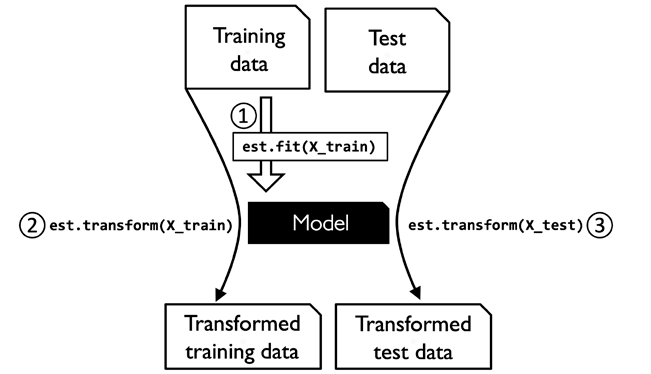

*Fig 1. Using the scikit-learn API for data transformation*

그림 1은 교육 데이터에 scickit-learn transformer 인스턴스가 교육 데이터 세트 및 새로운 테스트 데이터세트를 변환하는 방법을 설명하는 그림이다.


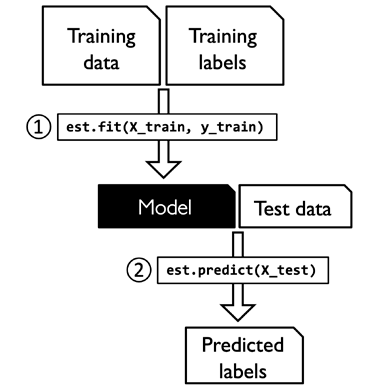

*Fig 2. Using the scikit-learn API for predictive models such as classifiers*

분류 작업을 위해 estimators를 훈련시킬 때 모델의 매개 변수를 학습하기 위해 적합 방법을 3장에서 사용했었다. 하지만 지도 학습 작업에서는 모델을 맞추기 위한 클래스 레이블을 추가로 제공하고, Fig 2에 설멷된 대로 예측 방법을 통해 레이블이 지정되지 않은 새롱누 데이터 예제에 대한 예측을 하는데 사용할 수 있다.

---
<br></br>

## **Handling categorical data**

지금까지 예시로 우리는 수치데이터만 가지고 예시를 다뤘다. 하지만 실제 데이터세트에는 하나 이상의 범주형 feature 열을 포함하는 것은 드문일이 아니다. 이 장에서는 수치 계산 라이브러리에서 이러한 유혀으이 데이터를 처리하는 방법에 대해 알아볼 것이다.

범주형 데이터에 대해 이야기할 떄, **`ordinal`**과 **`nominal`**을 구분해야 한다. 

**`ordinal`**은 정렬 또는 순서로 나열이 가능한 범주형 값으로 이해하면 된다. 예시로
`XL> L > M` 를 예시로 들 수 있으며,빨간색이 파란색보다 크다고 말하는 것은 일반적으로 말이 안되기에 **`nominal`**은 티셔츠 색상과 같은 명목상의 특징으로 이해하면 된다. 

### **Categorical data encoding with pandas**

카테고리데이터와 같은 범주형 데이터를 처리하는 기술을 알아보기 위해 새로운 데이터프레임을 생성



```
>>> import pandas as pd
>>> df = pd.DataFrame([
... ['green', 'M', 10.1, 'class2'],
... ['red', 'L', 13.5, 'class1'],
... ['blue', 'XL', 15.3, 'class2']])
>>> df.columns = ['color', 'size', 'price', 'classlabel']
>>> df
     color   size   price   classlabel
0    green    M      10.1    class2
1    red      L      13.5    class1
2    blue     XL     15.3    class2
```



새로 생성된 예시 데이터프레임은 `nominal`데이터인 `color`와 `ordinal`데이터인 `size`, `numerical`데이터인 `price` 열이 포함되어 있다. 클래스 레이블은 마지막 열에 저장이 되어있다.

---
<br></br>

### **Mapping ordinal features**

학습 알고리즘이 ordinal feature를 올바르게 해석하도록 하기위해 범주형 문자열 값을 정수로 변환해야 한다. 이 과정을 매핑(Mapping)이라고한다.
<br></br>

간단한 예시로는,

```
>>> size_mapping = {'XL': 3,
... 'L': 2,
... 'M': 1}

>>> df['size'] = df['size'].map(size_mapping)
>>> df
       color  size   price  classlabel
 0     green   1     10.1    class2
 1     red     2     13.5    class1
 2     blue    3     15.3    class2

```
위와 같이 매핑할 수 있다.

정수로 변환한 값을 다시 원래대로 돌리고 싶은 경우는 `pandas`에서 재공하는 **`inv_size_mapping`**으로 변환 가능하다.



```
>>> inv_size_mapping = {v: k for k, v in size_mapping.items()}
>>> df['size'].map(inv_size_mapping)

0 M
1 L
2 XL

Name: size, dtype: object
```



---
<br></br>

###**Encoding class labels**

많은 기계학습 머신러닝 라이브러리는 클래스 레이블이 정수 값으로 인코딩이 되어있다. scikit-learn의 분류에 대한 estimators는 내부적으로 정수로 변환하지만 기술적 결함을 피하기 위해 클래스 레이블을 정수 배열로 제공하는 것이 좋은 관행으로 간주된다. 클래스 레이블을 인코딩하기 위해서 앞에서  설명한 ordinal feature의 매핑과 유사한 방식을 사용할 수 있다. 클래스 레이블을 0부터 간단하게 열거해 매핑이 가능하다.



```
>>> import numpy as np
>>> class_mapping = {label: idx for idx, label in
... enumerate(np.unique(df['classlabel']))}
>>> class_mapping
{'class1': 0, 'class2': 1}
```


```
>>> df['classlabel'] = df['classlabel'].map(class_mapping)
>>> df
  color   size  price classlabel
0 green    1     10.1     1
1 red      2     13.5     0
2 blue     3     15.3     1
```




매핑을 클래스 레이블을 위에서 사용한 메소드로 다시 변환도 가능하다.

```
>>> inv_class_mapping = {v: k for k, v in class_mapping.items()}
>>> df['classlabel'] = df['classlabel'].map(inv_class_mapping)
>>> df
   color size price classlabel
0  green  1    10.1  class2
1  red    2    13.5  class1
2  blue   3    15.3  class2
```



`scikit-learn`에서 제공하는 **`LabelEncoder`**클래스를 이용해 쉽게 인코딩할 수 있다.



```
>>> from sklearn.preprocessing import LabelEncoder
>>> class_le = LabelEncoder()
>>> y = class_le.fit_transform(df['classlabel'].values)
>>> y
array([1, 0, 1])
```



### **Performing one-hot encoding on nominal features**

윗 장에서 `ordinal`의 매핑방법에 대해서 알아봤다면, 이 파트에서는 `nominal`데이터에 대한 매핑 방법에 대해서 알아본다.
`ordinal`을 매핑했을 때 `scikit-learn`에서 제공하는 `LabelEncoder`를 사용해 정수로 문자열 레이블을 인코딩했다. 이 접근 방식과 유사한 방식을 이용해 `nominal`데이터를 변환해본다.



```
>>> X = df[['color', 'size', 'price']].values
>>> color_le = LabelEncoder()
>>> X[:, 0] = color_le.fit_transform(X[:, 0])
>>> X
array([[1, 1, 10.1],
[2, 2, 13.5],
[0, 3, 15.3]], dtype=object)
```



실행한 후 NumPy 배열의 첫 번째 열인 X는 다음과 같이 인코딩된 새로운 색상 값을 보유한다.

* 파란색 = 0
* 녹색 = 1
* 빨강 = 2


이렇게 매핑할 경우 초록이 파란색보다 크며, 빨강이 초록보다 크다. 라고 생각할 수 있기에 최적의 방법은 아니다.

이를 해결하기 위한 아이디어로 **`one-hot encoding`**이 있다.

이 방식은 행에서 의미있다고 생각하는 부분에 1을 그에 반대되는 부분을 0으로 가짜 feature를 생성해서 데이터를 표시하는 방식이다.  


예를 들어 파란색에 대한 예제로는

* 파란색 = 1
* 녹색 = 0
* 빨강 = 0

으로 인코딩될 수 있다.

`scikit-learn`의 `OneHotEncoder`를 통해 사용할 수 있다.



```
>>> from sklearn.preprocessing import OneHotEncoder
>>> X = df[['color', 'size', 'price']].values
>>> color_ohe = OneHotEncoder()
>>> color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray()
array([[0., 1., 0.],
[0., 0., 1.],
[1., 0., 0.]])
```



위 코드는 한열에 대해서만 onehotencdoer를 적용시켰는데, 여러 열에도 변환을 시키고 싶으면, `ColumnTransformer`를 통해 변환가능하다.



```
>>> from sklearn.compose import ColumnTransformer
>>> X = df[['color', 'size', 'price']].values
>>> c_transf = ColumnTransformer([
... ('onehot', OneHotEncoder(), [0]),
... ('nothing', 'passthrough', [1, 2])
... ])
>>> c_transf.fit_transform(X).astype(float)
array([[0.0, 1.0, 0.0, 1, 10.1],
[0.0, 0.0, 1.0, 2, 13.5],
[1.0, 0.0, 0.0, 3, 15.3]])
```



passthrough 옵션을 통해 첫 번째 열을 제외한 나머지 열은 건들지 않도록 설정했다. one-hot encoding으로 dummy feature를 만드는 더 간단하고 쉬운 방법은 pandas 라이브러리의 get_dummies()를 사용하는 방법이다.



```
>>> pd.get_dummies(df[['price', 'color', 'size']])
    price  size    color_blue color_green color_red
0     10.1   1         0          1           0
1     13.5   2         0          0           1
2     15.3   3         1          0           0
```



원핫 인코딩 데이터 세트를 사용할 때, 우리는 이것이 특정 방법(예: 매트릭스 반전이 필요한 방법)에 문제가 될 수 있는 다중 공선성을 도입한다는 것을 명심해야 한다. 형상이 높은 상관 관계가 있는 경우 행렬은 계산적으로 뒤집기가 어려우며, 이는 수치적으로 불안정한 추정치로 이어질 수 있다. 변수 간의 상관 관계를 줄이기 위해, 우리는 단순히 원핫 인코딩 배열에서 하나의 형상 열을 제거할 수 있다. 그러나 형상 열을 제거해도 중요한 정보를 잃지 않는다. 예를 들어, color_green=0과 color_red=0을 관찰하면 관측치가 파란색이어야 함을 의미하기 때문에 color_blue 열을 제거해도 형상 정보는 여전히 보존된다.

get_dummies 함수를 사용한다면, 다음 코드 예제와 같이 true 인수를 drop_first 매개 변수에 전달함으로써 첫 번째 열을 드롭할 수 있다.



```
>>> pd.get_dummies(df[['price', 'color', 'size']],
... drop_first=True)
    price  size   ecolor_green color_red
0    10.1   1       1           0
1    13.5   2       0           1
2    15.3   3       0           0
```



OneHotEncoder를 통해 중복 열을 삭제하려면 다음과 같이 drop='first'를 설정하고 범주='auto'를 설정하면 삭제가능하다.



```
>>> color_ohe = OneHotEncoder(categories='auto', drop='first')
>>> c_transf = ColumnTransformer([
... ('onehot', color_ohe, [0]),
... ('nothing', 'passthrough', [1, 2])
... ])
>>> c_transf.fit_transform(X).astype(float)
array([[ 1. , 0. , 1. , 10.1],
[ 0. , 1. , 2. , 13.5],
[ 0. , 0. , 3. , 15.3]])
```



---
<br></br>

##**Partitioning a dataset into separate training and test datasets**

모델이 테스트 데이터에 대해 class-label을 맞출 경우, 이는 편향되지 않았다고 고려된다. 새로운 데이터셋인 Wine을 이용해 전처리과정을 거치고 차원 감소문제를 발생시키지 않는 feature selection 기법을 알아본다.

판다 라이브러리를 사용하여 UCI 머신러닝 저장소에서 오픈 소스 Wine 데이터 세트를 직접 읽어온다.



```
>>> df_wine = pd.read_csv('https://archive.ics.uci.edu/'
... 'ml/machine-learning-databases/'
... 'wine/wine.data', header=None)
>>> df_wine.columns = ['Class label', 'Alcohol',
... 'Malic acid', 'Ash',
... 'Alcalinity of ash', 'Magnesium',
... 'Total phenols', 'Flavanoids',
... 'Nonflavanoid phenols',
... 'Proanthocyanins',
... 'Color intensity', 'Hue',
... 'OD280/OD315 of diluted wines',
... 'Proline']
>>> print('Class labels', np.unique(df_wine['Class label']))
Class labels [1 2 3]
>>> df_wine.head()
```



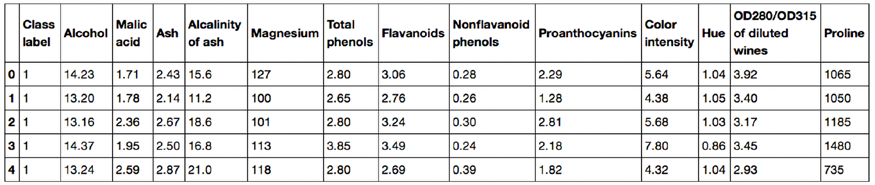

Fig 3.sample of  wine dataset

이 예제는 이탈리아의 같은 지역에서 재배되지만 서로 다른 와인 재배 품종에서 파생된 세 가지 다른 유형의 포도를 가리키는 세 가지 다른 클래스인 1, 2, 3 중 하나에 속한다.
이 데이터 세트를 무작위로 별도의 테스트 및 훈련 데이터 세트로 분할하는 편리한 방법은 `skickit-learn`의 `model_selection` 하위 모듈의 `train_test_split` 함수를 사용하는 것이다.



```
>>> from sklearn.model_selection import train_test_split
>>> X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
>>> X_train, X_test, y_train, y_test =\
... train_test_split(X, y,
... test_size=0.3,
... random_state=0,
... stratify=y)
```



먼저 형상 열의 NumPy 배열 표현을 변수 X에 할당하고 첫 번째 열의 클래스 레이블을 변수 y에 할당했다. 그런 다음 train_test_split 함수를 사용하여 X와 y를 별도의 교육 및 테스트 데이터 세트로 임의로 분할했다.

---
<br></br>

## **Bringing features onto the same scale**

`features scaling`은 쉽게 잊혀질 수 있는 사전 처리 파이프라인의 중요한 단계이다. `의사 결정 트리`와 `랜덤 포레스트`는 `features scaling`에 대해 걱정할 필요가 없는 몇 안 되는 기계 학습 알고리즘 중 두 가지입니다. 이 알고리즘들은 규모 불변입니다. 


그러나 경사 하강 최적화 알고리즘을 구현할 때 2장 '분류를 위한 간단한 기계 학습 알고리즘 훈련'에서 본 것처럼 기능이 동일한 척도에 있으면 대부분의 기계 학습 및 최적화 알고리즘이 훨씬 더 잘 작동한다.

예시를 들어보자.

하나의 `feature가 1~10`, 두 번째 `feature가 1~100,000` 일 때, 가중치를 같은 비율로 적용시키더라고 숫자 크기의 차이때문에 영향을 미칠 수 있다.

 데이터를 정규화하기 위해 각 형상 열에 최소-최대 스케일링을 적용할 수 있으며, 여기서 x(i)와 같은 새로운 값인 new x(i)은 다음과 같이 계산할 수 있다.

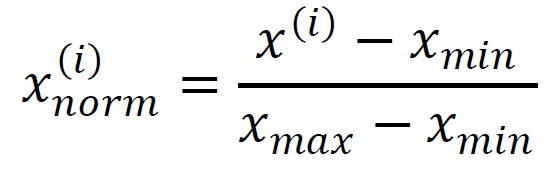


위 수식에서 x(i)는 특정 데이터, x min은 featrue 열에서 최소값 반대로 x max는 최대값을 의미

코드로 구현하면



```
>>> from sklearn.preprocessing import MinMaxScaler
>>> mms = MinMaxScaler()
>>> X_train_norm = mms.fit_transform(X_train)
>>> X_test_norm = mms.transform(X_test)
```

로 표현할 수 있다.



---
<br></br>

## **Selecting meaningful features**

모델이 테스트 데이터 세트보다 훈련 데이터 세트에서 훨씬 더 잘 수행된다는 것을 알게 되면, 이 관찰은 과적합에 대한 강력한 지표이다.

3장에서 `Scikit-Learn`을 사용한 기계 학습 분류기 둘러보기, 과적합은 모델이 훈련 데이터 세트의 특정 관찰과 관련하여 매개 변수를 너무 밀접하게 적합하지만 새로운 데이터에 잘 일반화하지 않는다는 것을 의미한다. 

과적합의 이유는 모델이 주어진 훈련 데이터에 비해 너무 복잡하기 때문이다.

이를 해결할 방법으로는


* 더 많은 교육 데이터 수집
* regularization를 통해 복잡성에 대한 패널티를 도입
* 파라미터가 더 적은 더 단순한 모형 선택
* 데이터의 차원 축소

가 있다.

### **L1 and L2 regularization as penalties against model complexity**

L2 정규화는 큰 개별 가중치에 불이익을 줌으로써 모형의 복잡성을 줄이는 하나의 접근법이라는 것을 3장에서 상기할 것이다.벡터 w의 L2의 제곱 규범을 다음과 같이 정의했다.

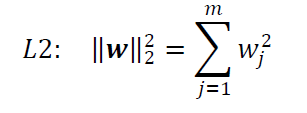

모델 복잡성을 줄이기 위한 또 다른 접근법은 관련 L1 정규화이다.

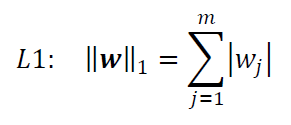

여기서 단순히 `가중치의 제곱을 가중치의 절대값의 합으로 대체`했다.

L2 정규화와 달리 L1 정규화는 일반적으로 희소 형상 벡터를 산출하며, 대부분의 형상 가중치는 0이 될 것이다. 
특히 훈련 예제보다 관련성이 없는 차원이 더 많은 경우, 관련성이 없는 기능이 많은 고차원 데이터 세트가 있는 경우 희소성은 실제로 유용할 수 있다.
 이러한 의미에서 L1 정규화는 특징 선택을 위한 기법으로 이해될 수 있다.

### **A geometric interpretation of L2 regularization**

 L2 규제는 비규제된 손실 함수로 훈련된 모델에 비해 덜 극단적인 가중치를 효과적으로 초래하는 손실 함수에 패널티을 추가한다.


 L1 규제가 어떻게 희소성을 장려하는지 더 잘 이해하기 위해,규제의 기하학적 해석을 살펴보자. 두 개의 무게 계수 w1과 w2에 대한 볼록 손실 함수의 윤곽선을 그려 보자.

2장에서 아달린에 대해 사용한 평균 제곱 오차(MSE) 손실 함수를 고려할 것이며, 이 함수는 훈련 세트의 모든 N개 예에 대해 평균화된 실제 및 예측 클래스 레이블 사이의 제곱 거리 y와 ^y 사이의 제곱 거리를 계산한다. 

MSE는 구형이기 때문에 로지스틱 회귀 분석의 손실 함수보다 그리기 쉽다. 우리의 목표는 그림5(타원의 중심에 있는 점)와 같이 훈련 데이터에 대한 손실 함수를 최소화하는 가중치 계수의 조합을 찾는 것이다.

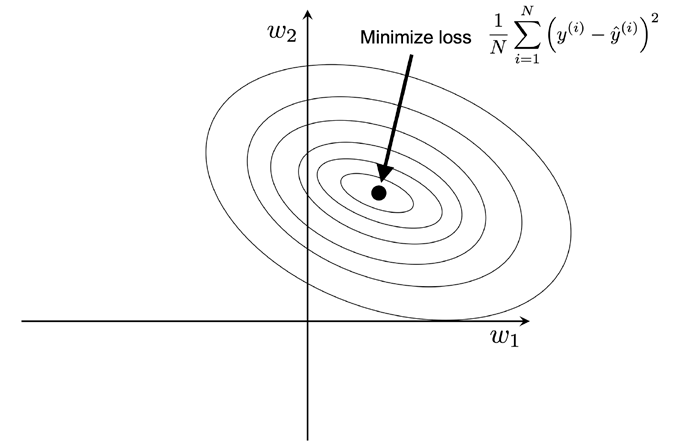

Fig 5. Miniminzing the mean squared error loss fuction

규제 매개 변수인 𝜆 ,를 통해 규제 강도를 높임으로써 가중치를 0으로 줄이고 훈련 데이터에 대한 모델의 의존도를 낮춘다. 

L2 패널티 조건에 대한 설명은 다음 그림6으로 설명한다.

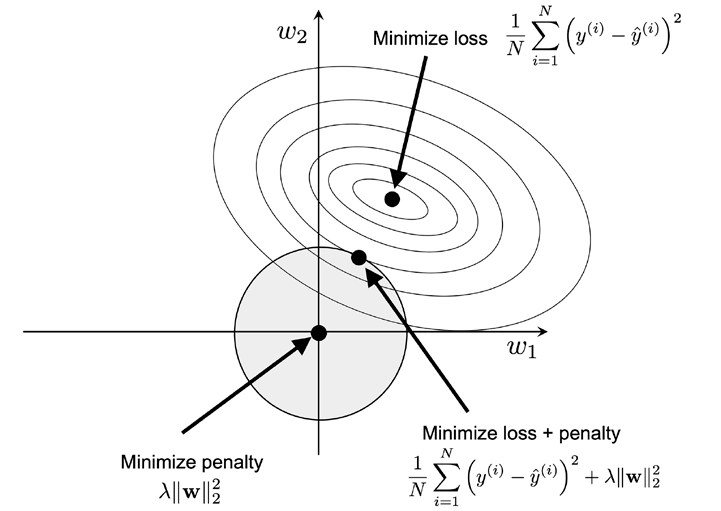

Fig 6.Applying L2 regularization to the loss function

---
<br></br>

### **Sparse solutions with L1 regularization**

이제 L1 규제와 희소성에 대해 논의해 보자. L1 규제 뒤의 주요 개념은 이전 섹션에서 논의한 것과 유사하다. 그러나 L1 패널티는 절대 가중치 계수의 합이므로(L2 항이 2차임을 기억하라), 그림 7과 같이 다이아몬드 모양의 예산으로 나타낼 수 있다.

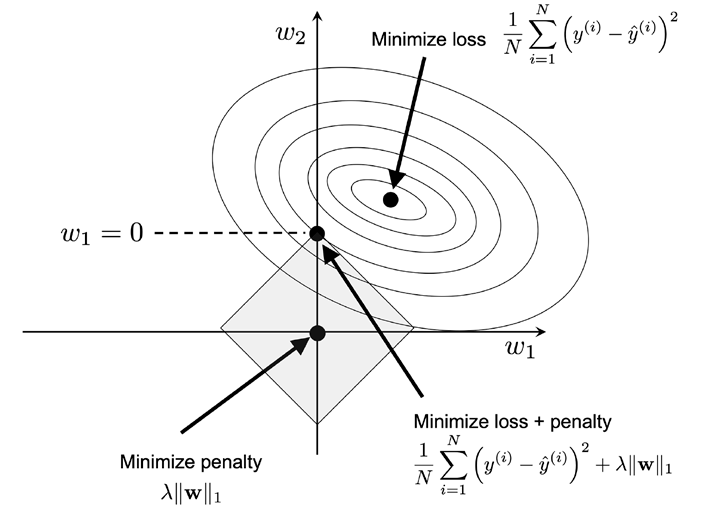

Fig 7. Applying L1 regularization to the loss function

앞의 그림에서 손실 함수의 윤곽이 w1 = 0에서 L1 다이아몬드와 접촉한다는 것을 알 수 있다. L1 규제된 시스템의 윤곽은 날카롭기 때문에 최적, 즉 손실 함수의 타원들과 L1 다이아몬드의 경계 사이의 교차점이 축에 위치할 가능성이 더 높다.

L1 규제를 지원하는 skickit-learn에서 규제된 모델의 경우, 우리는 단순히 패널티 매개 변수를 'L1'로 설정하여 희소 솔루션을 얻을 수 있다.



```
>>> from sklearn.linear_model import LogisticRegression
>>> LogisticRegression(penalty='l1',
... solver='liblinear',
... multi_class='ovr')
```



또한 'lbfgs'는 현재 L1 규제된 손실 최적화를 지원하지 않기 때문에 다른 최적화 알고리즘(예: solver='liblinear')을 선택해야 한다. 규제된 와인 데이터에 적용하면 L1 규제된 로지스틱 회귀 분석에서 다음과 같은 희박한 솔루션을 얻을 수 있다.



```
>>> lr = LogisticRegression(penalty='l1',
... C=1.0,
... solver='liblinear',
... multi_class='ovr')
>>> # Note that C=1.0 is the default. You can increase
>>> # or decrease it to make the regularization effect
>>> # stronger or weaker, respectively.
>>> lr.fit(X_train_std, y_train)
>>> print('Training accuracy:', lr.score(X_train_std, y_train))
Training accuracy: 1.0
>>> print('Test accuracy:', lr.score(X_test_std, y_test))
Test accuracy: 1.0
```



교육 및 테스트 정확도(둘 다 100%)는 우리 모델이 두 데이터 세트 모두에서 완벽한 작업을 수행한다는 것을 나타낸다. lr.intercept_ 속성을 통해 절편 용어에 액세스하면 배열이 세 가지 값을 반환한다는 것을 알 수 있다.



```
>>> lr.intercept_
array([-1.26317363, -1.21537306, -2.37111954])
```



각각 클래스에 대응하는 모델의 클래스 배열이다.

```
>>> lr.coef_
array([[ 1.24647953, 0.18050894, 0.74540443, -1.16301108,
0. ,0. , 1.16243821, 0. ,
0. , 0. , 0. , 0.55620267,
2.50890638],
[-1.53919461, -0.38562247, -0.99565934, 0.36390047,
-0.05892612, 0. , 0.66710883, 0. ,
0. , -1.9318798 , 1.23775092, 0. ,
-2.23280039],
[ 0.13557571, 0.16848763, 0.35710712, 0. ,
0. , 0. , -2.43804744, 0. ,
0. , 1.56388787, -0.81881015, -0.49217022,
0. ]])
```



언급했듯이 기능 선택의 방법으로 작용하는 L1 규제의 결과로, 우리는 이 데이터 세트의 잠재적으로 관련이 없는 기능에 강력한 모델을 훈련시켰다. 

그러나 엄밀히 말하면, 이전 예제의 가중치 벡터는 0보다 0이 아닌 항목을 더 많이 포함하기 때문에 반드시 희소하지는 않다. 

그러나 규제 강도를 더 높임으로써 희소성(더 많은 0 항목)을 강제할 수 있다. 즉, C 매개 변수에 대해 더 낮은 값을 선택할 수 있다.

이 장의 규제에 대한 마지막 예에서는 규제 강도를 변경하고 규제 경로(다른 규제 강도에 대한 다양한 특징의 가중치 계수)를 표시할 것이다.



```
>>> import matplotlib.pyplot as plt
>>> fig = plt.figure()
>>> ax = plt.subplot(111)
>>> colors = ['blue', 'green', 'red', 'cyan',
... 'magenta', 'yellow', 'black',
... 'pink', 'lightgreen', 'lightblue',
... 'gray', 'indigo', 'orange']
>>> weights, params = [], []
>>> for c in np.arange(-4., 6.):
... lr = LogisticRegression(penalty='l1', C=10.**c,
... solver='liblinear',
... multi_class='ovr', random_state=0)
... lr.fit(X_train_std, y_train)
... weights.append(lr.coef_[1])
... params.append(10**c)
>>> weights = np.array(weights)
>>> for column, color in zip(range(weights.shape[1]), colors):
... plt.plot(params, weights[:, column],
... label=df_wine.columns[column + 1],
... color=color)
>>> plt.axhline(0, color='black', linestyle='--', linewidth=3)
>>> plt.xlim([10**(-5), 10**5])
>>> plt.ylabel('Weight coefficient')
>>> plt.xlabel('C (inverse regularization strength)')
>>> plt.xscale('log')
>>> plt.legend(loc='upper left')
>>> ax.legend(loc='upper center',
... bbox_to_anchor=(1.38, 1.03),
... ncol=1, fancybox=True)
>>> plt.show()
```



C는 regularization parameter 𝜆의 역수를 의미한다.

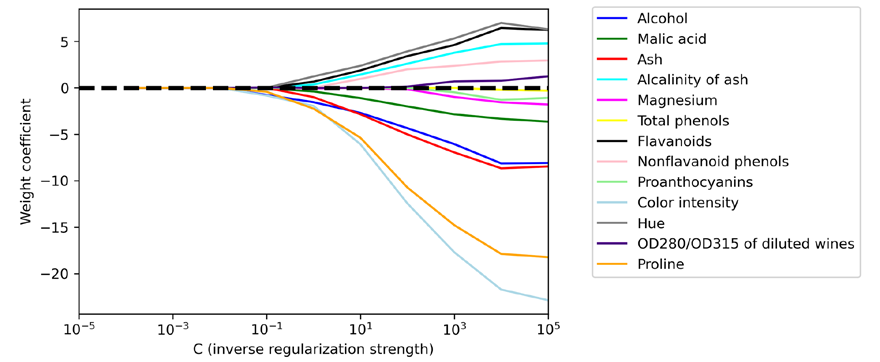

Fig 8.The impact of the value of the regularization strength hyperparameter C

---
<br></br>

### **Sequential feature selection algorithms**

모델의 복잡성을 줄이고 과적합을 방지하는 대안적인 방법은 기능 선택을 통한 치수 감소이며, 이는 특히 비정규화된 모델에 유용하다. 치수 감소 기술에는 형상 선택과 형상 추출이라는 두 가지 주요 범주가 있다. 

피쳐 선택을 통해 원래 피쳐의 하위 집합을 선택하는 반면, 피쳐 추출에서는 피쳐 집합에서 정보를 도출하여 새 피쳐 하위 공간을 구성한다.



---



순차적 특징 선택 알고리즘은 초기 d차원 특징 공간을 k<d인 k차원 특징 부분 공간으로 줄이는 데 사용되는 탐욕스러운 검색 알고리즘 계열이다. 

기능 선택 알고리즘의 배경에는 문제와 가장 관련이 있는 기능의 하위 집합을 자동으로 선택하거나 계산 효율성을 향상시키거나 관련 없는 기능이나 노이즈를 제거하여 모델의 일반화 오류를 줄이는 것이 있는데, 이는 규제를 지원하지 않는 알고리즘에 유용할 수 있다.



---



고전적인 순차적 특징 선택 알고리즘은 `순차적 역선택(sequential backward selection - SBS)`으로, 계산 효율성을 향상시키기 위해 분류기 성능의 최소 감쇠로 초기 특징 하위 공간의 차원을 줄이는 것을 목표로 한다. 

경우에 따라 SBS는 모델이 과적합으로 인해 어려움을 겪을 경우 모델의 예측 능력을 향상시킬 수 있다.

기준 함수에 의해 계산된 기준은 단순히 특정 기능의 제거 전후의 분류기의 성능 차이일 수 있다. 그런 다음 각 단계에서 제거할 기능은 단순히 이 기준을 최대화하는 기능으로 정의될 수 있다. 더 간단한 용어로, 각 단계에서 제거 후 성능 손실을 가장 적게 유발하는 기능을 제거한다. SBS에 대한 선행 정의를 바탕으로, 우리는 알고리즘을 네 가지 간단한 단계로 개략적으로 설명할 수 있다.

> 1. k=d를 통해 알고리즘을 정의한다. 여기서 d는 full feature sapce의 차원을 뜻한다.
2. argmax(X_k - x)를 최대화 하는 feature x^-를 찾는다.
3. 2번에서 찾은 X^-를 지운다.
4. 원하는 차원이 나올 때 까지 2~3번을 반복한다.

코드 구현



```
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS:
 def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
     self.scoring = scoring
     self.estimator = clone(estimator)
     self.k_features = k_features
     self.test_size = test_size
     self.random_state = random_state

 def fit(self, X, y):
 	 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size,
 														random_state=self.random_state)
	dim = X_train.shape[1]
 	self.indices_ = tuple(range(dim))
 	self.subsets_ = [self.indices_]
 	score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
 	self.scores_ = [score]
 
 	while dim > self.k_features:
 		scores = []
 		subsets = []

		for p in combinations(self.indices_, r=dim - 1):
 			score = self._calc_score(X_train, y_train, X_test, y_test, p)
            scores.append(score)
 			subsets.append(p)
        
        best = np.argmax(scores)
 		self.indices_ = subsets[best]
 		self.subsets_.append(self.indices_)
 		dim -= 1
 
 		self.scores_.append(scores[best])    
   self.k_score_ = self.scores_[-1]
   
   return self
   
 def transform(self, X):
 	return X[:, self.indices_]
 
 def _calc_score(self, X_train, y_train, X_test, y_test, indices):
 	self.estimator.fit(X_train[:, indices], y_train)
 	y_pred = self.estimator.predict(X_test[:, indices])
 	score = self.scoring(y_test, y_pred)
 	return score  
```



위 코드에서 `k_features` 파라미터를 설정함으로써 원하는 수의 feature만 남도록 설정했다.
 추가로, `scikit-learn`에서 제공하는 `accuracy_score`를 이용해 feature subsets에서의 성능을 평가한다.

`fit`의 내부 while에서, `combination`이 원하는 차원 수에 도달할 수 있도록 평가를 진행하고 차원을 줄여나간다. 각 `iteration`에서 `self.scores_`에 정확도가 담기며, 이 점수는 결과를 평가할 때 사용한다. 최종 feature는 `self.indices_`에 담기며, 이후 `transform`에서 사용한다.



---



이제 skickit-learn의 KNN 분류기를 사용하여 SBS가 실제로 구현되는 것을 알아보자.



```
>>> import matplotlib.pyplot as plt
>>> from sklearn.neighbors import KNeighborsClassifier
>>> knn = KNeighborsClassifier(n_neighbors=5)
>>> sbs = SBS(knn, k_features=1)
>>> sbs.fit(X_train_std, y_train)
```





---



SBS 구현이 이미 데이터 세트를 적합 함수 내부의 테스트 및 훈련 데이터 세트로 분할했지만, 여전히 훈련 데이터 세트인 X_train을 알고리즘에 공급했다. 

그런 다음 SBS 적합 방법은 테스트(검증) 및 훈련을 위한 새로운 훈련 하위 세트를 만들 것이며, 이것이 이 테스트 세트를 유효성 검사 데이터 세트라고도 한다. 

이 접근 방식은 원래 테스트 세트가 교육 데이터의 일부가 되는 것을 방지하기 위해 필요하다.

BS 알고리듬은 각 단계에서 최고의 기능 하위 집합의 점수를 수집한다는 것을 기억 해야한다. 따라서 구현에서 더 흥미로운 부분으로 이동하고 검증 데이터 세트에 계산된 KNN 분류기의 분류 정확도를 플롯한다.



```
>>> k_feat = [len(k) for k in sbs.subsets_]
>>> plt.plot(k_feat, sbs.scores_, marker='o')
>>> plt.ylim([0.7, 1.02])
>>> plt.ylabel('Accuracy')
>>> plt.xlabel('Number of features')
>>> plt.grid()
>>> plt.tight_layout()
>>> plt.show()
```



그림 9에서 볼 수 있듯이, 기능 수를 줄임으로써 검증 데이터 세트에서 KNN 분류기의 정확도가 향상되었으며, 이는 3장에서 KNN 알고리듬의 맥락에서 논의한 차원의 저주가 감소했기 때문일 가능성이 있다.

 또한 **`다음 그림에서 분류기가 k = {3, 7, 8, 9, 10, 11, 12에 대해 100% 정확도를 달성했음을 알 수 있다.`**

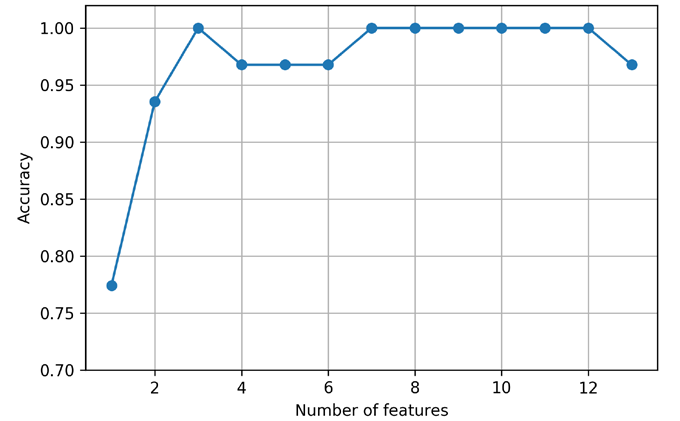

Fig 9. Impact of number of features on model accuracy

---
<br></br>

## **Assessing feature importance with random forests**

데이터 세트에서 관련 기능을 선택하기 위한 또 다른 유용한 접근법은 3장에서 소개된 앙상블 기술인 랜덤 포리스트를 사용하는 것이다.

 랜덤 포리스트를 사용하면 데이터가 선형적으로 분리 가능한지 여부에 대한 가정을 하지 않고 포리스트의 모든 의사 결정 트리에서 계산된 평균 불순물 감소에 따라 특징의 중요성을 측정할 수 있다. 
 
 편리하게 sickit-learn의 랜덤 포레스트 구현은 이미 우리를 위해 기능 중요도 값을 수집하여 `Random Forest Classifier`를 장착한 후 `feature_importions_ `속성을 통해 액세스할 수 있다. 다음 코드를 실행하여 Wine 데이터 세트에서 500개의 트리로 구성된 포리스트를 교육하고 각각의 중요도 척도를 기준으로 13개 기능의 순위를 매깁니다.



```
>>> from sklearn.ensemble import RandomForestClassifier
>>> feat_labels = df_wine.columns[1:]
>>> forest = RandomForestClassifier(n_estimators=500,
... random_state=1)
>>> forest.fit(X_train, y_train)
>>> importances = forest.feature_importances_
>>> indices = np.argsort(importances)[::-1]
>>> for f in range(X_train.shape[1]):
... print("%2d) %-*s %f" % (f + 1, 30,
... feat_labels[indices[f]],
... importances[indices[f]]))
>>> plt.title('Feature importance')
>>> plt.bar(range(X_train.shape[1]),
... importances[indices],
... align='center')
>>> plt.xticks(range(X_train.shape[1]),
... feat_labels[indices], rotation=90)
>>> plt.xlim([-1, X_train.shape[1]])
>>> plt.tight_layout()
>>> plt.show()
1) Proline 0.185453
2) Flavanoids 0.174751
3) Color intensity 0.143920
4) OD280/OD315 of diluted wines 0.136162
5) Alcohol 0.118529
6) Hue 0.058739
7) Total phenols 0.050872
8) Magnesium 0.031357
9) Malic acid 0.025648
10) Proanthocyanins 0.025570
11) Alcalinity of ash 0.022366
12) Nonflavanoid phenols 0.013354
13) Ash 0.013279
```



코드를 실행한 후, 우리는 와인 데이터 세트의 다양한 기능을 상대적 중요도에 따라 순위를 매기는 그림을 만들었다. 기능 중요도 값은 최대 1.0까지 합치도록 규제된다는 점에 유의한다.

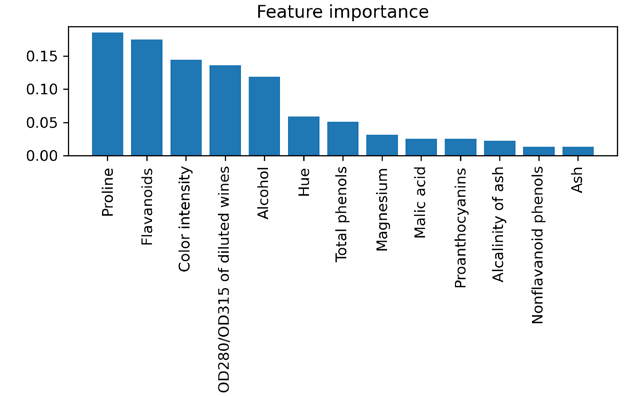


Fig 10.Random forest-based feature importance of the Wine dataset

---
<br></br>

## **Summary**

우리는 누락된 데이터를 올바르게 처리하기 위한 유용한 기술을 살펴보는 것으로 이 장을 시작했다. 기계 학습 알고리듬에 데이터를 공급하기 전에 범주형 변수를 올바르게 인코딩해야 하며, 이 장에서는 순서형 및 공칭 형상 값을 정수 표현에 매핑하는 방법을 살펴보았다.



모델의 복잡성을 줄임으로써 과적합을 피할 수 있는 L1 규제에 대해 간략하게 논의했다. 관련 없는 기능을 제거하기 위한 대안적 접근 방식으로, 우리는 순차적 기능 선택 알고리듬을 사용하여 데이터 세트에서 의미 있는 기능을 선택한다.